In [1]:
pip install fbprophet

### For real time data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
import pandas as pd
from fbprophet import Prophet

df = pd.read_csv('/content/drive/My Drive/DS_Project7/EBM_data_prophet.csv')
df.head()

,ds,y
0,2020-01-22,1
1,2020-01-23,2
2,2020-01-24,2
3,2020-01-25,2
4,2020-01-26,3


In [4]:
m = Prophet()
m.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [5]:
future = m.make_future_dataframe(periods=90)
future.tail()

,ds
185,2020-07-25
186,2020-07-26
187,2020-07-27
188,2020-07-28
189,2020-07-29


In [6]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
185,2020-07-25,1.877670e+06,1.708011e+06,2.056139e+06
186,2020-07-26,1.885286e+06,1.719794e+06,2.070127e+06
187,2020-07-27,1.893010e+06,1.710694e+06,2.063846e+06
188,2020-07-28,1.900818e+06,1.730497e+06,2.075850e+06
189,2020-07-29,1.919317e+06,1.736254e+06,2.097276e+06


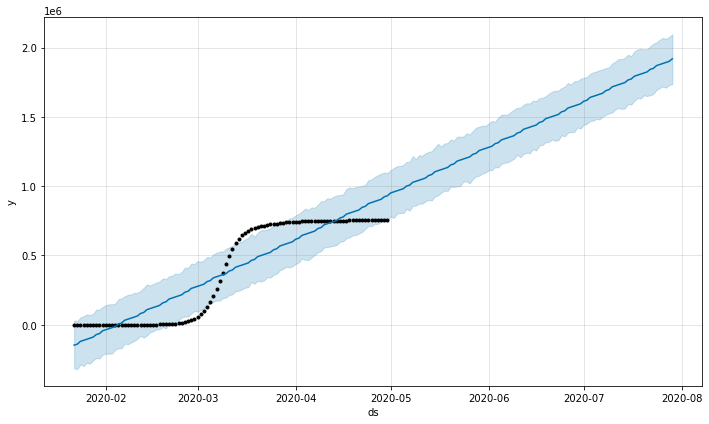

In [7]:
fig1 = m.plot(forecast)

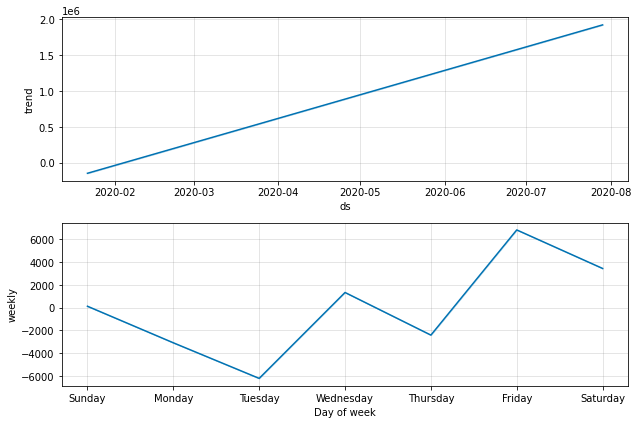

In [8]:
fig2 = m.plot_components(forecast)

In [9]:
#Configuring plotly
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML("""
    <script src="/static/components/requirejs/require.js"></script>
    <script> 
      requirejs.config({
          paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
          },
      });
      </script>
      """))
  
from fbprophet.plot import plot_plotly
import plotly.offline as py

configure_plotly_browser_state()

In [10]:
fig = plot_plotly(m, forecast)  # This returns a plotly Figure
py.iplot(fig)

In [11]:
#Setting a cap totalling to EBM's population
df['cap'] = 1000000

#Logistic fitting
m = Prophet(growth='logistic')
m.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


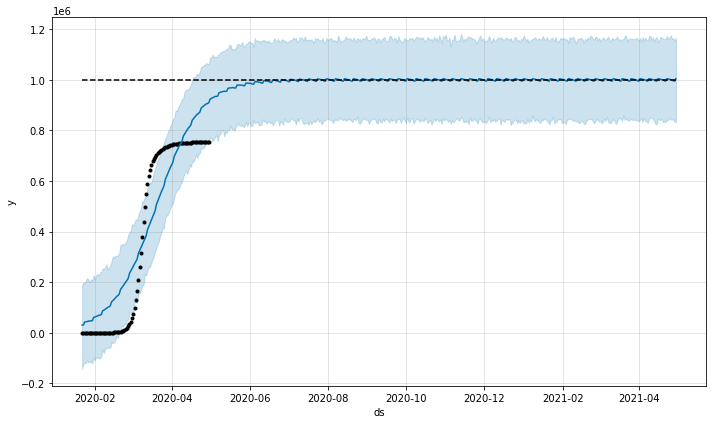

In [12]:
future = m.make_future_dataframe(periods=365)
future['cap'] = 1000000
fcst = m.predict(future)
fig = m.plot(fcst)

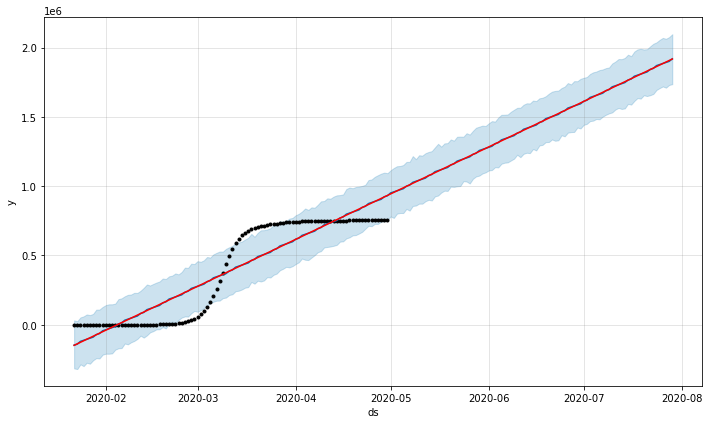

In [13]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

##Seasonality

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


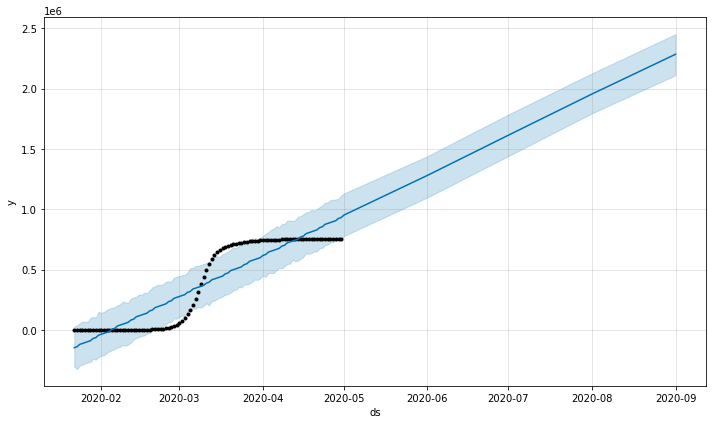

In [14]:
df1 = pd.read_csv('/content/drive/My Drive/DS_Project7/EBM_data_prophet.csv')
m1 = Prophet()
m1.fit(df1)
future1 = m1.make_future_dataframe(5, freq='MS')
forecast1 = m1.predict(future1)
fig1 = m1.plot(forecast1)

###Uncertainity in seasonality

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


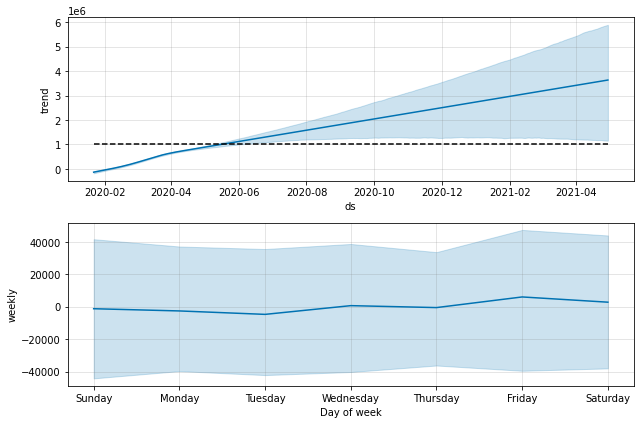

In [15]:
m2 = Prophet(mcmc_samples=300)
forecast2 = m2.fit(df).predict(future)
fig = m2.plot_components(forecast2)

In [16]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial = '74 days', period='180 days', horizon = '24 days')
df_cv.head()

INFO:fbprophet:Making 1 forecasts with cutoffs between 2020-04-06 00:00:00 and 2020-04-06 00:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-04-07,940478.707266,826513.184253,1.035765e+06,748750,2020-04-06
1,2020-04-08,944491.497339,841596.498264,1.051797e+06,749332,2020-04-06
2,2020-04-09,948482.637105,846499.518599,1.059381e+06,749841,2020-04-06
3,2020-04-10,951641.697973,848110.891874,1.061166e+06,750286,2020-04-06
4,2020-04-11,954122.055501,853007.260340,1.056656e+06,750675,2020-04-06


In [17]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,2 days,3.742356e+10,193451.707916,193444.102303,0.258255,0.258255,0.0
1,3 days,3.877286e+10,196908.264673,196900.567222,0.262678,0.262678,0.0
2,4 days,4.000131e+10,200003.271346,199998.667539,0.266642,0.266642,0.0
3,5 days,4.096741e+10,202404.077896,202401.376737,0.269695,0.269695,0.0
4,6 days,4.172657e+10,204270.828312,204269.173936,0.272052,0.272052,0.0


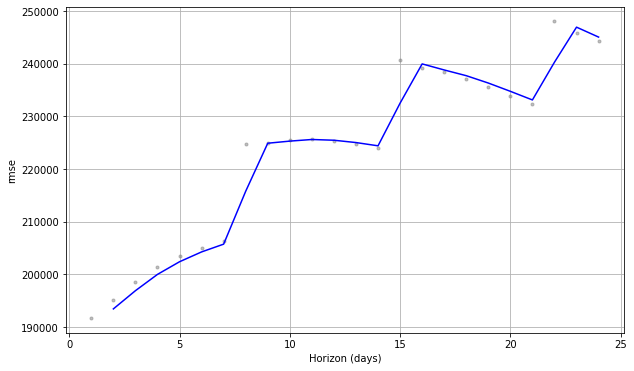

In [18]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='rmse')